# Submitted By: -
### 1) Jeel Gondaliya - B00819827

### 2) Sampark Pradhan - B00821733

# 1. Introduction to dataset
#### Explaining the dataset: -

Bengaluru is city in India which has a huge number of resturants having vast variety of cuisine types. Some of them are Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts etc. Currently there are more than 12,000 resturants in Bengaluru. Although this number keeps on increasing day by day the food industry has not been saturated yet and new resturants are opening every day. However it is quite difficult for these new resturants to compete with the already established ones. There are various concerns which poses difficulty for these new resturants like high real estate costs, rising food costs, shortage of quality manpower etc.
The main aim of this zomato dataset is to analyse the key factors which can help new resturants thrieve. By through analysis of this dataset we can decide on significant information about various attributes like their location, cost, neighbourhood and cuisines.

#### Meta data: -

url - URL address of the restaurant in zomato website.
<br>
address - Address of the resturants in Bengaluru.
<br>
name - Name of the resturants.
<br>
online_order - In case online order is available in resturants or not.
<br>
book_table - if table booking option is available or not.
<br>
rate - Overall rating of the resturants out of 5.
<br>
votes - The number of votes used to decide the rating of resturants.
<br>
phone - Contact number of the resturants.
<br>
location - The neighborhood in which the restaurant is located.
<br>
rest_type - contains the type of resturant.
<br>
dish_liked - dishes that people liked in resturants.
<br>
cuisines - The food styles in resturants, separated by comma.
<br>
approx_cost(for two people) - The approximate cost of meal for two people.
<br>
reviews_list - Contains review of resturants in a list of tuple format. Each tuple has two values, rating and review.
<br>
menu_item - Menus available in each resturant in a list format.
<br>
listed_in(type) - Contains type of meal.
<br>
listed_in(city) - The neighborhood in which the restaurant is listed.

In [108]:
# Required libraries
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import xgboost as xgb
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
import seaborn as sns

# 2. Data Preprocessing and Understanding

## a. Load the dataset

In [112]:
zomato_data = pd.read_csv("zomato.csv")
zomato_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [113]:
# Renaming all the columns by giving more meaningful names
zomato_data.set_axis(['url','address', 'name', 'online_order', 'book_table',
                      'rate','votes','phone','location','rest_type','dish_liked','cuisines','approx_cost',
                      'reviews_list','menu','meal_type','neighbourhood'], axis=1,inplace=True)

In [114]:
# Checking the number of null values
print(zomato_data.isnull().sum())
zomato_data.shape

url                  0
address              0
name                 0
online_order         0
book_table           0
rate              7775
votes                0
phone             1208
location            21
rest_type          227
dish_liked       28078
cuisines            45
approx_cost        346
reviews_list         0
menu                 0
meal_type            0
neighbourhood        0
dtype: int64


(51717, 17)

## b. Exploratory data analysis(EDA) to find intresting trends.

## Lets look at distribution of Continues variables

In [115]:
# Converting 'rate' column to flaot
zomato_data['rate'].replace('NEW',np.nan,inplace=True)
zomato_data['rate'].replace('-',np.nan,inplace=True)
zomato_data.rate = zomato_data.rate.astype(str)
zomato_data.rate = zomato_data.rate.apply(lambda x: x.replace('/5',''))
zomato_data.rate = zomato_data.rate.apply(lambda x: float(x))

In [116]:
# Converting 'approx_cost' column to flaot
zomato_data['approx_cost'] = zomato_data['approx_cost'].str.replace(',','')
zomato_data.dropna(subset=['approx_cost'],inplace=True)
zomato_data.approx_cost.unique()
zomato_data.approx_cost = zomato_data.approx_cost.apply(lambda x: float(x))

In [117]:
# Converting 'votes' column to flaot
zomato_data.votes = zomato_data.votes.apply(lambda x: float(x))

C:\Users\Sampark\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sampark\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Sampark\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Sampark\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


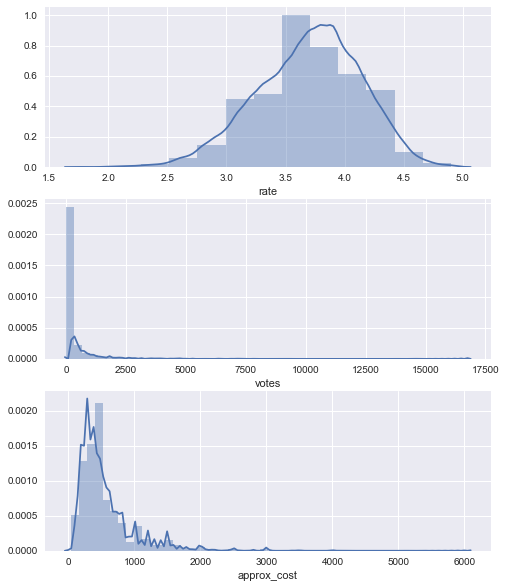

In [118]:
# Setting the figure size
fig = plt.figure(figsize=(8,10))

# For rate column 
ax1 = fig.add_subplot(3,1,1)
rating=zomato_data['rate']
sns.distplot(rating,bins=13,ax=ax1)

# For vote column
ax2 = fig.add_subplot(3,1,2)
votes = zomato_data['votes']
sns.distplot(votes ,ax=ax2)

#For approx_cost column
ax3 = fig.add_subplot(3,1,3)
votes = zomato_data['approx_cost']
sns.distplot(votes,ax=ax3)


## Lets look at some of Catagorical variables

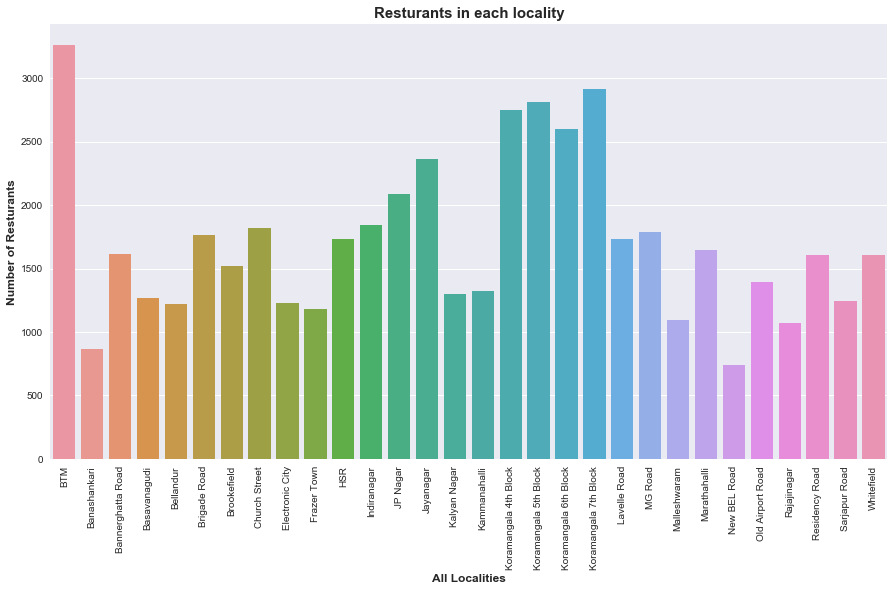

In [119]:
# For Resturants in each locality
plt.figure(figsize=(15, 8))
sns.countplot(zomato_data['neighbourhood'].sort_values())
plt.title('Resturants in each locality',fontsize=15,fontweight='bold')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('All Localities',fontsize=12,fontweight='bold')
plt.ylabel('Number of Resturants',fontsize=12,fontweight='bold');

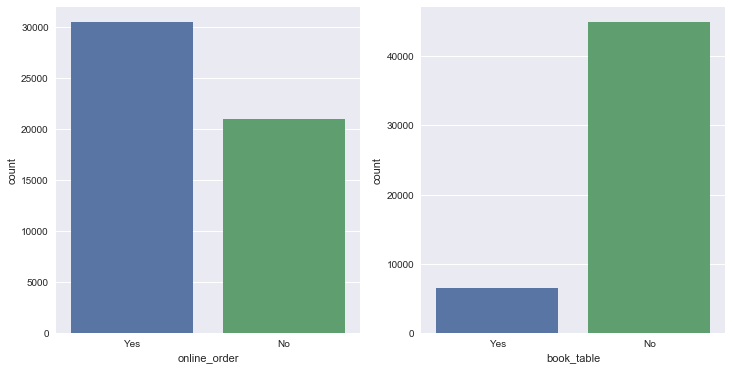

In [120]:
# Lets look at distribution of Online Orders and Table Booking Variables
figure = plt.figure(figsize=(12,6))
axis1 = figure.add_subplot(1,2,1)
axis2 = figure.add_subplot(1,2,2)
sns.countplot(x=zomato_data['online_order'],ax=axis1)
sns.countplot(x=zomato_data['book_table'],ax=axis2)

In [121]:
# Droping unnecessary columns that we found by performing Exploratory data analysis(EDA) above
zomato_data.drop(['url','phone','menu'], inplace=True,axis=1)

## c. Dropping all duplicates restaurants
We deleted all the duplicate resturants by taking the combination of two columns, 'name' and 'location' as no same resturants can be located within same locality.

In [62]:
# Dropping duplicate resturants w.r.t location.
zomato_data.drop_duplicates(subset=['name', 'location'],inplace=True)
print("After dropping all duplicate resturants the shape of the dataset is " , zomato_data.shape)

After dropping all duplicate resturants the shape of the dataset is  (12094, 14)


In [64]:
# Replacing the nan with unknown for some of the columns
zomato_data['location'].replace(np.NaN,'unknown',inplace=True)
zomato_data['rest_type'].replace(np.NaN,'unknown',inplace=True)
zomato_data['dish_liked'].replace(np.NaN,'unknown',inplace=True)
zomato_data['cuisines'].replace(np.NaN,'unknown',inplace=True)

In [65]:
# Replacing all 'nan' values in rate column by finding the mean of rate w.r.t location.
mean_rating_location = zomato_data.groupby('location')['rate'].mean()
zomato_data['rate'].fillna(zomato_data['location'].map(mean_rating_location), inplace = True)

In [66]:
# For 11 row we have 'nan' in location thus replacing rate by average rate of entire dataset.
zomato_data['rate'].fillna(3.6, inplace=True)
zomato_data['rate'] = round(zomato_data['rate'],1)

## d. Finding maxmimum average rating of neighbourhood

In [69]:
# Maxixmun avearge rating in neighbourhood
rate_neighbourhood = zomato_data.groupby('neighbourhood')['rate'].mean()
print(rate_neighbourhood.idxmax(),"has Maxmimum average rating of among all neighbourhood which is:-",rate_neighbourhood.max())

Brigade Road has Maxmimum average rating of among all neighbourhood which is:- 3.7459173871277622


In [70]:
# creating a dataframe which only has the data of maximum average rating
is_brigade_road =  zomato_data['neighbourhood']== rate_neighbourhood.idxmax()
brigade_road_neighbourhood = zomato_data[is_brigade_road]

Finding the major characteristics like Resturant types, Cuisines and meal types of brigade_road_neighbourhood and plotting them in pie-charts.

In [71]:
restaurantTypeCount=brigade_road_neighbourhood['rest_type'].value_counts().sort_values(ascending=False)
cuisinesTypeCount=brigade_road_neighbourhood['cuisines'].value_counts().sort_values(ascending=False)
meal_typeTypeCount=brigade_road_neighbourhood['meal_type'].value_counts().sort_values(ascending=False)

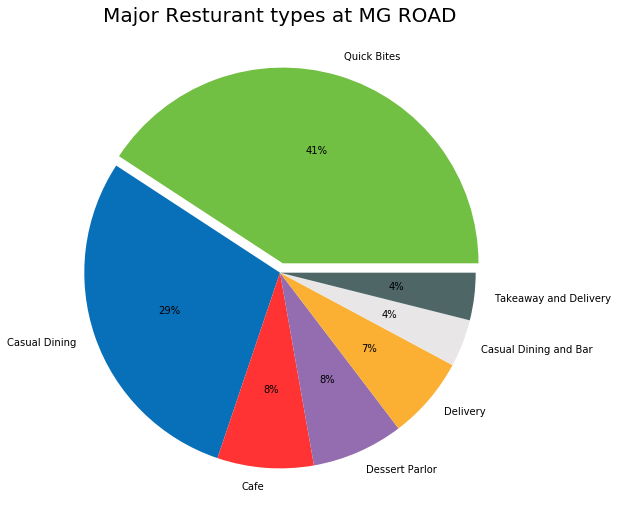

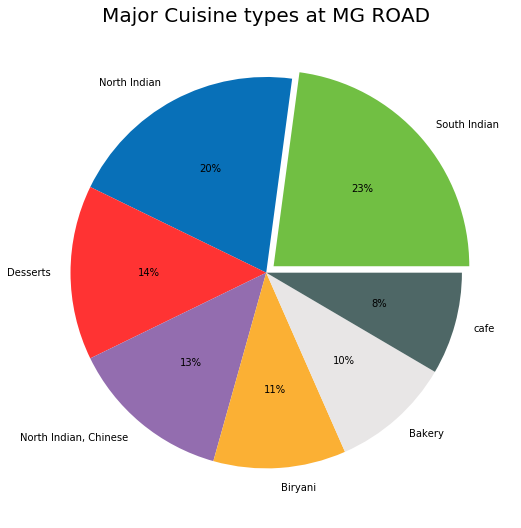

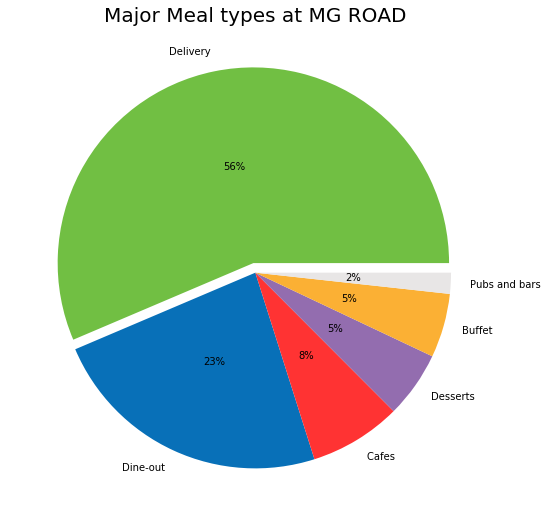

In [72]:
# Plotting the major characteristics of resturants in highest rated neighbourhood.
fig = plt.figure(figsize=(20,15))

parts=[restaurantTypeCount[0], restaurantTypeCount[1], restaurantTypeCount[2], restaurantTypeCount[3], restaurantTypeCount[4],
      restaurantTypeCount[5], restaurantTypeCount[6]]
labels_rest_type=['Quick Bites','Casual Dining','Cafe','Dessert Parlor','Delivery','Casual Dining and Bar','Takeaway and Delivery']
colors = ['#71BF43','#0870B8','#ff3333','#936DAF','#FBB034','#E8E6E6','#4E6766']
plt.pie(parts,colors=colors,  autopct='%1.0f%%', pctdistance=.6, labels=labels_rest_type, labeldistance=1.1,explode =(0.05, 0, 0, 0, 0, 0, 0))
pie_resttype = plt.gcf()
plt.title("Major Resturant types at MG ROAD").set_size(20)
pie_resttype.set_size_inches(9,9)
plt.show()

parts=[cuisinesTypeCount[0], cuisinesTypeCount[1], cuisinesTypeCount[2], cuisinesTypeCount[3], cuisinesTypeCount[4],
      cuisinesTypeCount[5], cuisinesTypeCount[6]]
labels_cuisines=['South Indian','North Indian ','Desserts','North Indian, Chinese','Biryani','Bakery','cafe']
colors = ['#71BF43','#0870B8','#ff3333','#936DAF','#FBB034','#E8E6E6','#4E6766']
plt.pie(parts,colors=colors, autopct='%1.0f%%', pctdistance=.6, labeldistance=1.1,labels=labels_cuisines,explode =(0.05, 0, 0, 0, 0, 0, 0))
pie_cuisines = plt.gcf()
plt.title("Major Cuisine types at MG ROAD").set_size(20)
pie_cuisines.set_size_inches(9,9)
plt.show()


parts=[meal_typeTypeCount[0], meal_typeTypeCount[1], meal_typeTypeCount[2], meal_typeTypeCount[3], meal_typeTypeCount[4],
      meal_typeTypeCount[5]]
labels_mealtype=['Delivery','Dine-out','Cafes ','Desserts','Buffet ','Pubs and bars ']
colors = ['#71BF43','#0870B8','#ff3333','#936DAF','#FBB034','#E8E6E6']
plt.pie(parts,colors=colors, pctdistance=.5, autopct='%1.0f%%',  labels=labels_mealtype,labeldistance=1.1,explode =(0.05, 0, 0, 0, 0, 0))
pie_mealtype = plt.gcf()
plt.title("Major Meal types at MG ROAD").set_size(20)
pie_mealtype.set_size_inches(9,9)
plt.show()

# 3. Building the model to forcast the approx cost for two people

## a. Supervised Regression problem
This is a supervised regression problem. It is supervised as we have got the labeled data along with the target variable which
we want to predict. This is a Regression problem as are predicting continuous values i.e, approx cost for two people.

## b. Regression Models

We have used three model, Linear Regression, Random Forest and XG boost. 

Random Forest Regressor -  Random forest regressor is an ensemble model. As RandomForestRegressor a bagging approach it involves building serevral trees and then combining to improve the genral stability of model. We have choosed this model because it handles outliers and unbalanced data. Each Learner has a high variance but low bias and as we are averaging the variance as well we are having a low bias and moderate variance model.

XGBOOST - It is a boosting technique i.e., it combines a set of weak learner to derieve an algorithm with improved accuracy. 
We have choosed this model as it penalizess more complex models through regularization(both Lasso(L1) and Ridge(L2)) thus in most cases avoiding overfitting.

Decision Tree Regressor- We have chose Decision Tree Regressor as it is simple and easy to understand. This is a greedy approach and thus we cannot control the overfittig. Thus we have choose XGBOOST over this algorithm.

## c. Metrics that we used to evaluate our model

We have used two metrics to evaluate our model namely: - Mean Squared Error(MSE), R2 Score.

1) Mean Squared Error is the simplest regression error metric to understand. In this we calculate the residual for every data point and we square the difference before summing the value of all data points.

2) R2 Score is a statistical measure that indicates the rate of a variance for a dependant variable that is explained by independent variables in an regression models. To simply put it explains to what extent the variance of one variable explains the variance of another. The highest posible score is 1.0 and it can go to negetive as well.

3) Explained variance score is a regression score function and the best possible score is 1.0 . It is same as R2 score when mean error =0 .

## d. Overfitting
We are avoiding overfitting by didvind data into train and test set and k-folds cross validation. 
<br>
However the holdout data gives us a single estimate of genralization of model's accuracy but still it can be a lucky or unlucky choice of our training and holdout set. To negate this we are using cross validation approach. Cross validation is implemented in section 3 e.
<br>
We are also tunning the hyperparameters in gamma in XGBRegressor to control the model's complexity thus avoiding overfiting.

In [73]:
# Created new dataframe of the most informative attributes

zomato_data_final = zomato_data[['location','rate','rest_type','cuisines','approx_cost']]
zomato_data_final.head()

,location,rate,rest_type,cuisines,approx_cost
0,Banashankari,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Banashankari,4.1,Casual Dining,"Chinese, North Indian, Thai",800.0
2,Banashankari,3.8,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,Banashankari,3.7,Quick Bites,"South Indian, North Indian",300.0
4,Basavanagudi,3.8,Casual Dining,"North Indian, Rajasthani",600.0


In [74]:
# Encoding the catagorical columns using get_dummies method

zomato_data_final = pd.get_dummies(zomato_data_final, columns=['location','rest_type','cuisines'],prefix = ['location','rest_type','cuisines'])
print(zomato_data_final.head())

   rate  approx_cost  location_BTM  location_Banashankari  location_Banaswadi  \
0   4.1        800.0             0                      1                   0   
1   4.1        800.0             0                      1                   0   
2   3.8        800.0             0                      1                   0   
3   3.7        300.0             0                      1                   0   
4   3.8        600.0             0                      0                   0   

   location_Bannerghatta Road  location_Basavanagudi  \
0                           0                      0   
1                           0                      0   
2                           0                      0   
3                           0                      0   
4                           0                      1   

   location_Basaveshwara Nagar  location_Bellandur  location_Bommanahalli  \
0                            0                   0                      0   
1                     

In [75]:
# Scaling rate and approx_cost(numerical columns) using standard scaler.
train_norm = zomato_data_final[zomato_data_final.columns[0:2]]
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
normalized_data = zomato_data_final.update(training_norm_col)
zomato_data_final.head()

,rate,approx_cost,location_BTM,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,location_Bellandur,location_Bommanahalli,...,"cuisines_Turkish, Arabian, Fast Food, Salad, Healthy Food, Desserts","cuisines_Turkish, Chinese","cuisines_Turkish, Desserts","cuisines_Turkish, Fast Food","cuisines_Turkish, Fast Food, Biryani, Chinese","cuisines_Turkish, Rolls",cuisines_Vietnamese,"cuisines_Vietnamese, Salad","cuisines_Vietnamese, Thai, Burmese, Japanese",cuisines_unknown
0,1.279251,0.790130,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.279251,0.790130,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.480391,0.790130,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.214104,-0.479053,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.480391,0.282457,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## e. Cross Validation and Finding the Best Model
To evaluate the model, we are using cross validation to make sure that the model does not over fit by splitting data into 10 folds. As it has number of folds for training and testing, it makes sure the model is memorising but generalizing.

XGBoost is the best model out of three model, which we have used. As the mean squared error of xgboost is the lowest and r2 squre is the highest from other other algorithm. Moreover, XgBoost algorithm uses number models and these models are trained sequencially. The current model focus on the previous error made by the previous model. Hence, the over all acuracy is high for xgboost model. 

In [76]:
# Divide data into train and test set
feature = zomato_data_final.loc[:, zomato_data_final.columns != 'approx_cost']
target = zomato_data_final['approx_cost']
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=20)
print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(8465, 2777) (8465,) (3629, 2777) (3629,)


In [37]:
# Decision tree regressor
regr = DecisionTreeRegressor(random_state=20)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

dec_r2 = r2_score(y_test, y_pred)
dec_mse = mean_squared_error(y_test, y_pred)

print("R2 score : ", dec_r2)
print("Mean squared error: " , dec_mse)
print("variance score : ",explained_variance_score(y_test, y_pred))

R2 score :  0.5924680274868817
Mean squared error:  0.4095258151814683
variance score :  0.59641567781882


In [31]:
# XGBOOST
xg_reg = xgb.XGBRegressor(n_estimators = 400,max_depth= 5, objective= 'reg:linear', min_child_weight= 1, subsampling=1.0,colsample_bytree = 0.3,learning_rate =0.1, gamma =0.0)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [38]:
# Evaluation
xg_r2 = r2_score(y_test, preds)
xg_mse = mean_squared_error(y_test, preds)
print("Mean squared error: " , xg_mse)
print("R2 score : ", xg_r2)
print("variance score : ",explained_variance_score(y_test, preds))

Mean squared error:  0.2593439866904982
R2 score :  0.7419186714552756
variance score :  0.7419199288424182


In [80]:
# Random Forest regressor
regr = RandomForestRegressor(n_estimators =200, random_state=42)
regr.fit(X_train,y_train)
predict = regr.predict(X_test)

In [81]:
# Evaluation
random_r2 = r2_score(y_test, predict)
random_mse =  mean_squared_error(y_test, predict)
print("Mean squared error: " , mean_squared_error(y_test, predict))
print("R2 score : ", r2_score(y_test, predict))
print("variance score : ",explained_variance_score(y_test, predict))

Mean squared error:  0.2867618311436689
R2 score :  0.7146343152124164
variance score :  0.7169963253360777


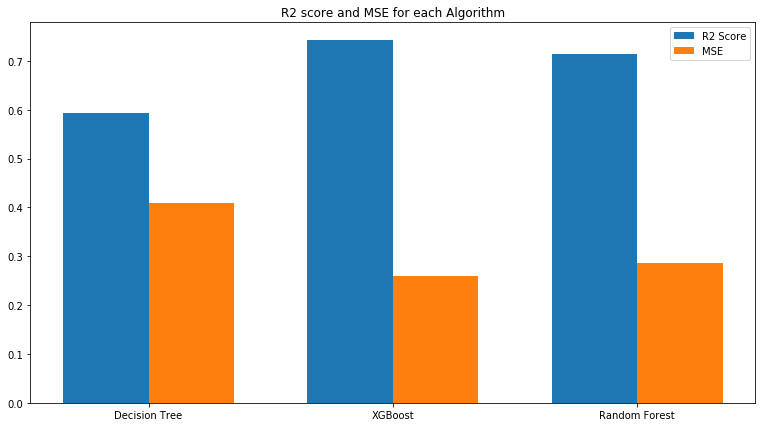

In [84]:
# Compare the accuracy and average_class accuracy for each algorithm 
no_of_algorithm = 3
r2_score = [dec_r2,xg_r2,random_r2]
MSE = [dec_mse, xg_mse,random_mse]
count = np.arange(no_of_algorithm) 
width = 0.35       
plt.figure(figsize=(13,7))
plt.bar(count, r2_score, width, label='R2 Score')
plt.bar(count + width, MSE, width, label='MSE')
plt.title('R2 score and MSE for each Algorithm')
plt.xticks(count + width / 2, ('Decision Tree', 'XGBoost','Random Forest'))
plt.legend(loc='best')
plt.show()

In [33]:
# CROSS VALIDATIONS
xg_reg = xgb.XGBRegressor()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xg_reg, feature, target, cv=kfold)

C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:32:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:34:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:36:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:38:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:40:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:42:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:44:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:46:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:48:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:50:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score :  0.6462007180403793


In [34]:
print("R2 score : ", np.mean(results))

R2 score :  0.6462007180403793


## f. Compare train set and test set using fitting graph

In [102]:
size = [1, 150, 403, 2300, 4589, 8465]

size, train_mse_scores, test_mse_scores = learning_curve(
estimator = xgb.XGBRegressor(),
X = feature,
y = target, train_sizes = size, cv = 5,
scoring = 'neg_mean_squared_error')

C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:14:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:14:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:14:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:14:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:14:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:15:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:17:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:17:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:17:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:17:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:17:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:18:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:20:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:20:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:20:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:20:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:20:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:21:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:23:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:23:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:23:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:23:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:23:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:24:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:26:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:26:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:26:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:26:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:26:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:27:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [104]:
train_mse_mean = -train_mse_scores.mean(axis = 1)
test_mse_mean = -test_mse_scores.mean(axis =1)

(0, 2)

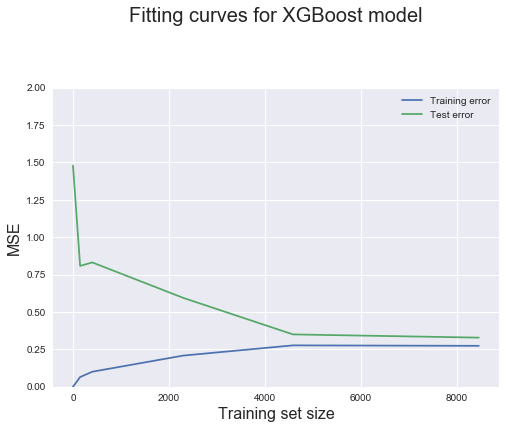

In [122]:
plt.style.use('seaborn')
plt.plot(size, train_mse_mean, label = 'Training error')
plt.plot(size, test_mse_mean, label = 'Test error')
plt.ylabel('MSE', fontsize = 16)
plt.xlabel('Training set size', fontsize = 16)
plt.title('Fitting curves for XGBoost model', fontsize = 20, y = 1.2)
plt.legend()
plt.ylim(0,2)

This curve shows the performance of holdout data compared to training data when we linearly increase the training set size. The accuracy of model depends on how complex the model is. This graph shows the difference between model's procedure accuracy on training and testing data when we increase the complexity of model. In our scenario, the "sweet spot" is around (4800,0.26).

## g. Grid Search to improve the performance of model

We have used Grid search  to improve our model to performance.

Grid-searching is the process of scanning the data to configure best parameters for a given model. We will be using grid search method on  XGBReressor() and finding optimal values for min_child_weight and max_depth parameters.

It is improving our model's performance as hyperparameter is a characteristic of a model that is external to the model and whose value cannot be estimated from data. In order to find the optimal value for hyperparameters of the model we are using grid search method. In this case we are using grid search with XGBRegressor(). In our case it is giving a min_child_weight value as '1' and max_depth as '5'. By giving this value as parameters to XGBRegressor our model's r2 Score increased significantly by 5%.

In [30]:
xg_reg = xgb.XGBRegressor()
params = {
        'min_child_weight': [1, 5, 10],
        'max_depth': [3, 4, 5]
        }
grid = GridSearchCV(xg_reg, params)
grid.fit(X_train,y_train)
grid.best_params_  # max_depth': 5, 'min_child_weight': 1 in the output section

C:\Users\Sampark\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:06:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:07:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:09:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:10:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:11:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:12:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:14:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:16:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:17:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:18:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:21:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:22:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:23:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:25:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:26:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:27:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:34:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:35:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:37:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:38:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:40:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sampark\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:41:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'max_depth': 5, 'min_child_weight': 1}

In [32]:
# After getting the grid search value in xgboost
prd = grid.predict(X_test)
print("Mean squared error: " , mean_squared_error(y_test, prd))
print("R2 score : ", r2_score(y_test, prd))

Mean squared error:  0.29094491608032047
R2 score :  0.7104715963013555


In [35]:
print("variance score : ",explained_variance_score(y_test, prd))

variance score :  0.7104715966711854


## h. Implementing relief feature selection to improve our model 

In [123]:
# We are converting feature and target both as numpy.ndarray as datafram is giving "key error 0"
my_feature = feature.as_matrix(columns=None)
my_target= target.as_matrix(columns=None)

C:\Users\Sampark\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Sampark\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
# we are using pipeline to process Relief 2 features in XGBRegressor algorithm.
ref = make_pipeline(ReliefF(n_features_to_select=2, n_neighbors=100),xgb.XGBRegressor())

In [ ]:
# To find the improved cross_val_score.
# Due to lack of computational power it running for long hours.
print(np.mean(cross_val_score(ref, my_feature, my_target,cv=3)))

[06:01:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# REFERENCES
[1]M. Learning and C. Python, "Complete Guide to Parameter Tuning in XGBoost (with codes in Python)", Analytics Vidhya, 2019. [Online]. Available: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/. [Accessed: 02- Jul- 2019].
<br>
[2]"Open Source Tools & Data Science Competitions", Slideshare.net, 2019. [Online]. Available: https://www.slideshare.net/odsc/owen-zhangopen-sourcetoolsanddscompetitions1. [Accessed: 02- Jul- 2019].
<br>
[3]P. group, A. Andersen, P. Schwarz, P. Patil, V. Vincent and k. singleton, "Pandas: filling missing values by mean in each group", Stack Overflow, 2019. [Online]. Available: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-
by-mean-in-each-group. [Accessed: 02- Jul- 2019].
<br>
[4]"Zomato Bangalore Restaurants", Kaggle.com, 2019. [Online]. Available: https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants. [Accessed: 02- Jul- 2019].
<br>
[5]"Zomato Bangalore Restaurants", Kaggle.com, 2019. [Online]. Available: https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants/kernels. [Accessed: 02- Jul- 2019].
<br>
[6]Fostor Provost and Tom Fawcett, Data Science for Business, 2nd ed. 2013, pp. 111,141.
<br>
[7]"Why Random Forest is My Favorite Machine Learning Model", Medium, 2019. [Online]. Available: https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706. 